In [1]:
from utils.loaders import EpicKitchensDataset, ActionNetDataset
from omegaconf import OmegaConf
import random
import torch
import librosa
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

### Test dataloader for different configs

In [9]:
dataset_conf = OmegaConf.create(
    {'annotations_path': 'train_val', 'shift': 'D1-D1', 'workers': 4, 'stride': 2, 'resolution': 224, 'RGB': {'data_path': '../an_data/frames/', 'tmpl': 'img_{:010d}.jpg', 'features_name': '5c_5f'}, 'Event': {'rgb4e': 6}, 'stride': 1}
)

for split in ['train', 'val']:
    for sampling in [True]:
        for num_frames in [32]:
            num_clips = 10
            dt = ActionNetDataset("ActionNet", 
                                    ['EMG'], 
                                    split, 
                                    dataset_conf, 
                                    {'RGB':16, 'EMG': num_frames}, 
                                    num_clips, {'RGB': True, 'EMG': sampling}, 
                                    load_feat=False,
                                    additional_info=False, require_spectrogram = True)
            done = True
            for i in tqdm(range(len(dt))):
                try:
                    dt[i]
                except Exception as e: 
                    done = False
                    print(f"Sample number {i} - Dense: {sampling}, num_frames = {num_frames}, {split} dataset has failed because of the following error:")
                    print(f"{e}\n\n\n\n\n")
            if done:
                print(f"Dense: {sampling}, num_frames = {num_frames} {split} dataset has passed\n\n")
            else:
                print(f"Dense: {sampling}, num_frames = {num_frames} {split} dataset has failed\n\n")
            
            dataloader = torch.utils.data.DataLoader(dt, batch_size=32, shuffle=False, num_workers=0)
            for i, data in enumerate(dataloader):
                continue
            print(f"Batch test passed\n\n")


2023-06-04 19:37:33 LOG INFO Dataloader for ActionNet - train with 526 samples generated
 15%|█▌        | 81/526 [00:03<00:16, 26.94it/s]


KeyboardInterrupt: 

### S04

In [32]:
dataset_conf = OmegaConf.create(
    { 'annotations_path': 'train_val',
      'shift': 'Actionnet-Actionnet', 
      'workers': 4, 'stride': 1, 
      'resolution': 224, 
      'RGB': {
          'data_path': '../an_data/frames/', 
          'tmpl': 'img_{:010d}.jpg', 
          'features_name': 'ACTIONNET/FT_D_S04_16f_5c'
        }, 
       'EMG': {'features_name': 'ACTIONNET_EMG/2023-06-08/job_feature_extraction_lr0.234_2023-06-08 20:08:58.903778'}, 'stride': 1}
)

num_clips = 10
dt = ActionNetDataset("ActionNet", 
                                    ['EMG'], 
                                    'train', 
                                    dataset_conf, 
                                    {'RGB':16, 'EMG': 32}, 
                                    num_clips, {'RGB': True, 'EMG': False}, 
                                    load_feat=False,
                                    additional_info=False, require_spectrogram = True)


sample, label = dt[1]


2023-06-18 12:01:42 LOG INFO Dataloader for ActionNet - train with 526 samples generated


In [33]:
label

1

In [30]:
data

,index,file,description,labels
40,40,S08_1.pkl,Spread jelly on a bread slice,Spread
10,10,S04_1.pkl,Get/replace items from refrigerator/cabinets/d...,Get/Put
6,6,S03_1.pkl,Clear cutting board,Clear
24,24,S08_1.pkl,Clear cutting board,Clear
6,6,S04_1.pkl,Slice a cucumber,Slice
...,...,...,...,...
49,49,S05_2.pkl,Clean a pan with a sponge,Clean
56,56,S09_2.pkl,Clean a plate with a sponge,Clean
3,3,S03_2.pkl,Spread almond butter on a bread slice,Spread
6,6,S02_2.pkl,Slice a cucumber,Slice


In [29]:
data = pd.read_pickle("action-net/ActionNet_train.pkl")

for i in range(len(data)):
    if data.iloc[i].file == "S04_1.pkl":
        print(i)
        break

1


Sample has shape: torch.Size([16, 320, 32])
Sample has shape(after reshape): torch.Size([10, 2, 8, 32, 32])


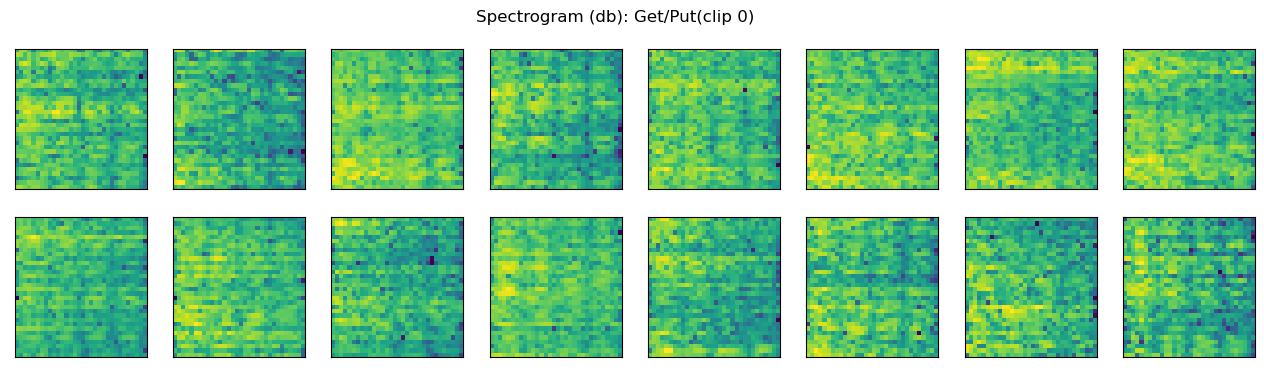

In [35]:
plt_image_and_signal(sample, label)

In [25]:
pd.read_pickle("saved_features/ACTIONNET/FT_D_S04_16f_5c_ActionNet_train.pkl")

{'features': [{'uid': 0,
   'video_name': 'S04',
   'features_RGB': array([[0.03616646, 0.16523781, 0.2189192 , ..., 0.34220544, 0.0331235 ,
           0.        ],
          [0.08039174, 0.06702148, 0.10413259, ..., 0.88719815, 0.13768716,
           0.83865035],
          [0.01692861, 0.06841416, 0.11201898, ..., 0.54499966, 0.26700157,
           0.1912239 ],
          [0.1480545 , 0.39276448, 0.3987759 , ..., 0.21732555, 0.10256889,
           0.38026178],
          [0.01827977, 0.7302969 , 0.08087061, ..., 0.4599922 , 0.6143151 ,
           0.34861118]], dtype=float32)},
  {'uid': 1,
   'video_name': 'S04',
   'features_RGB': array([[0.13915564, 0.16097666, 0.26205   , ..., 0.5116532 , 0.16891275,
           0.05193774],
          [0.12731199, 0.19768697, 0.20696048, ..., 0.52521044, 0.08843954,
           0.22350423],
          [0.07883092, 0.28853008, 0.10150946, ..., 0.3590976 , 0.10654148,
           0.22805347],
          [0.13139707, 0.14365141, 0.38258922, ..., 0.0926737 , 

In [21]:
train_annotation = pd.read_pickle('train_val/ActionNet_train.pkl')

train_annotation.iloc[14]


uid                                                                  14
subject                                                           S03_2
verb                                                              Clean
verb_class                                                            4
description                                   Clean a pan with a sponge
start_frame                                                       29610
stop_frame                                                        29650
start_ts                                                00:16:26.996973
end_ts                                                  00:16:28.319550
myo_left_readings     [[7, -4, 31, 51, 19, -5, -8, 24], [-15, -21, -...
myo_right_readings    [[0, 7, 1, 12, 4, 44, 53, 61], [56, -14, -12, ...
Name: 14, dtype: object

In [26]:
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(len(specgram), 1, figsize=(16, 8))

    axs[0].set_title(title or "Spectrogram (db)")

    for i, spec in enumerate(specgram):
        im = axs[i].imshow(librosa.power_to_db(specgram[i]), origin="lower", aspect="auto")
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)

    axs[i].set_xlabel("Frame number")
    axs[i].get_xaxis().set_visible(True)
    plt.show(block=False)


In [10]:
VERBS = ['Spread',
 'Get/Put',
 'Clear',
 'Slice',
 'Clean',
 'Pour',
 'Load',
 'Peel',
 'Open/Close',
 'Set',
 'Stack',
 'Unload']

In [9]:
def plt_image_and_signal(sample, label, clip_no = 0):
    # extract the image and the emg signal
    # frames = sample['RGB']
    signal = sample['EMG']
    print(f"Sample has shape: {signal.shape}")
    (channels, _, h) = signal.shape
    fig, axs = plt.subplots(2, 8, figsize=(16, 4))
    signal = signal.reshape(2, 8, -1, h, h)
    signal = signal.permute(2, 0, 1, 3, 4)
    print(f"Sample has shape(after reshape): {signal.shape}")
    clip = clip_no
    for arm in [0, 1]:
        for channel in range(8):
            # print(type(axs))
            im = axs[arm][channel].imshow(librosa.power_to_db(signal[clip][arm][channel]), origin="lower", aspect="auto")
            axs[arm][channel].get_xaxis().set_visible(False)
            axs[arm][channel].get_yaxis().set_visible(False)
    fig.suptitle(f"Spectrogram (db): {VERBS[label]}(clip {clip})")
    plt.show()

In [ ]:
for 

Sample has shape: torch.Size([16, 320, 32])
Sample has shape(after reshape): torch.Size([10, 2, 8, 32, 32])


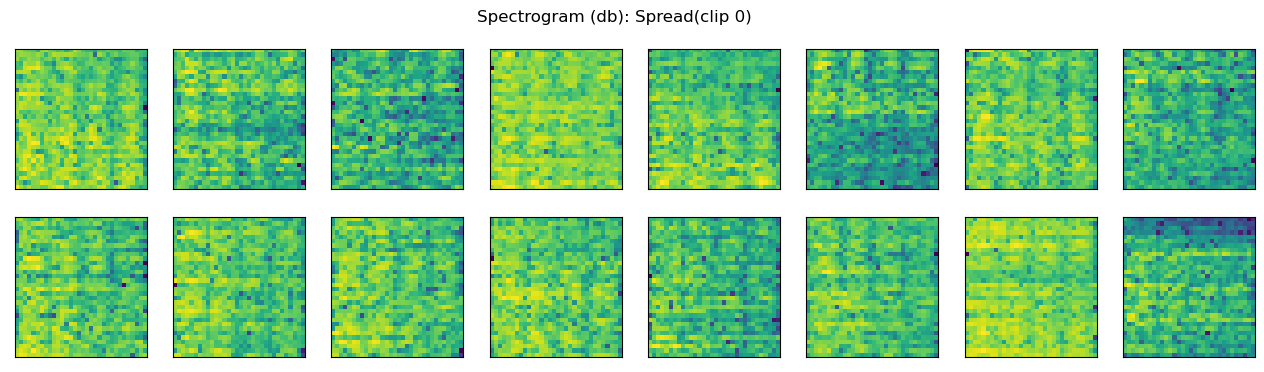

In [16]:
sample, label = dt[0]
plt_image_and_signal(sample, label, clip_no=0)

Sample has shape: torch.Size([16, 320, 64])
Sample has shape(after reshape): torch.Size([5, 2, 8, 64, 64])


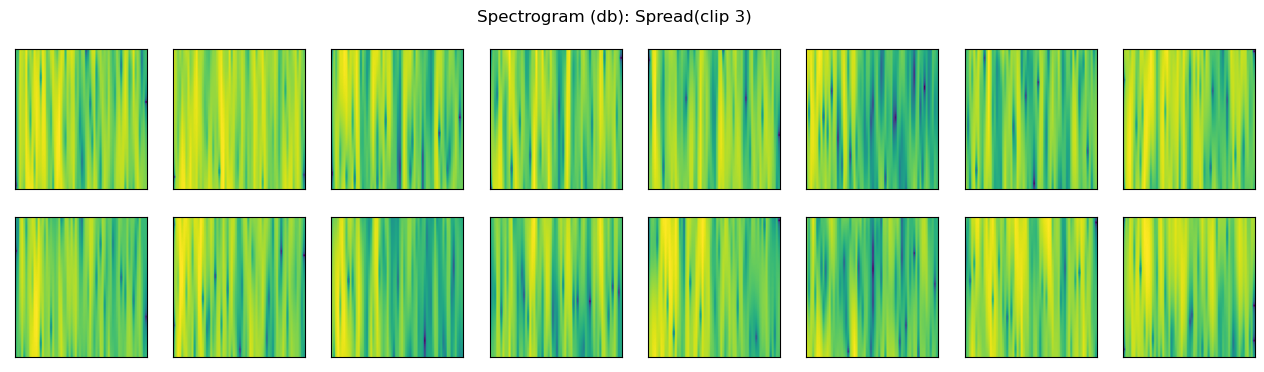

In [19]:
plt_image_and_signal(sample, label, clip_no=3)

### Load_feat test


In [2]:
dataset_conf = OmegaConf.create(
    {'annotations_path': 'train_val', 'shift': 'Actionnet-Actionnet', 'workers': 4, 'stride': 2, 'resolution': 224, 'RGB': {'data_path': '../an_data/frames/', 'tmpl': 'img_{:010d}.jpg', 'features_name': 'saved_features/ACTIONNET/FT_D_S04_16f_5c'}, 'EMG':  {'features_name':'saved_features/ACTIONNET_EMG/EMG_nf-32_clip-10_embedding_size-256_D' }, 'Event': {'rgb4e': 6}, 'stride': 1}
)

num_clips = 10
dt = ActionNetDataset("S04", 
                                    ['RGB', 'EMG'], 
                                    'train', 
                                    dataset_conf, 
                                    {'RGB':16, 'EMG': 32}, 
                                    num_clips, {'RGB': True, 'EMG': True}, 
                                    load_feat=True, 
                                    additional_info=True, require_spectrogram = True)

dt[7]
# for i in range(51):
#     try:
#         (sample, label, _, _) = dt[i]
#         sample
#     except Exception as e:
#         print(f"Sample number {i} has failed because of the following error:")
#         print(f"{e}\n\n\n\n\n")


2023-06-06 14:03:52 LOG INFO Dataloader for S04 - train with 51 samples generated


Len: 0


AssertionError: 